# *Importing libraries and packages 

In [14]:

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')



In [15]:
df=pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


# Classification problem

In [16]:
# first we will work on the classification on the basis of type of avocado 

In [17]:
df.isna().sum()  #  it gives the null values ,as we can see there are no null values 

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [18]:
df.nunique()  # it gives the unique values 

Unnamed: 0         53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

In [19]:
df_avocado=df.drop(['Date','Unnamed: 0','year'],axis=1)


# dropping the columns that are not adding any value to the classification problem 

In [20]:
df_avocado

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico


In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le=LabelEncoder()

df_avocado.region=le.fit_transform(df_avocado.region)



# putting the label encoder on the categorical column region so we can use it for algoriths 

In [23]:
df_avocado

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,0
...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,53
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,53
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,53
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,53


In [24]:
df_avocado.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,26.495644
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,15.583788
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,13.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,26.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,40.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,53.000000


In [25]:
# dividing the data into two parts for training and prediction 
# taking target as type of avocado

In [26]:
x=df_avocado.drop('type',axis=1)
x.shape

(18249, 10)

In [27]:
y=df_avocado['type']
y.shape

(18249,)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.30)

In [30]:
# applying logistic regression 


from sklearn.linear_model import LogisticRegression

In [31]:
lr=LogisticRegression()

In [32]:
lr.fit(x_train,y_train)

LogisticRegression()

In [33]:
pred=lr.predict(x_test)


In [34]:
print(accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))

93.22374429223744
[[2478  241]
 [ 130 2626]]


In [35]:
#  applying random forest classifier


from sklearn.ensemble import RandomForestClassifier

In [36]:
rfc=RandomForestClassifier()

In [37]:
rfc.fit(x_train,y_train)
rfc_pred=rfc.predict(x_test)
print(accuracy_score(y_test,rfc_pred)*100)
print(confusion_matrix(y_test,rfc_pred))

99.79908675799086
[[2717    2]
 [   9 2747]]


In [38]:
# applying support vector classification 

from sklearn.svm import SVC

In [39]:
#I DID RUN IT BUT IT IS TAKING ALOT OF TIME AS THIS IS SUPPORT VECTOR ,I AM LEAVING ON TO YOU IF YOU WANT TO RUN YOU CAN THANK YOU.

#kernellist=['rbf','linear']
#for i in kernellist:
 #   svc=SVC(kernel=i)
  #  svc.fit(x_train,y_train)
   # psvc=svc.predict(x_test)
    #print(accuracy_score(y_test,psvc)*100)

In [40]:
# checking the important features in random forest 

rfc.feature_importances_

array([0.04379875, 0.27606175, 0.06333347, 0.14503028, 0.10322545,
       0.15754605, 0.10759791, 0.00891393, 0.04062394, 0.05386847])

In [41]:
# applying the cross validation

from sklearn.model_selection import cross_val_score

In [42]:
score=cross_val_score(lr,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.92547945 0.89205479 0.93123288 0.93972603 0.91970403]
0.9216394358371781
0.01620432923652539


In [43]:
score=cross_val_score(rfc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.99424658 0.98630137 0.99369863 0.99232877 0.96848452]
0.9870119717543181
0.009685977109646833


In [44]:
# AGAIN THIS WAS TAKING FOREVER BEACUSE DATA HAS TOO MANY ROWS SO I LEFT IT ON YOU TO CHECK THANKS 

#score=cross_val_score(svc,x,y,cv=5)
#print(score)
#print(score.mean())
#print(score.std())

# selecting the best model 
# THE ACCURACY OF RANDOM FOREST IS BEST AS COMPARE TO LOGISTIC AND SUPPORT VECTOR CLASSIFIER ,SO 
# I WOULD RECOMEND TO USE RANDOM FOREST MODEL 

In [66]:
# saving the best model 
import  pickle as pk
file=open('avacardomodel.pkl','wb')
pk.dump(rfc,file)

# Regression problem

In [46]:
df=pd.read_csv('avocado.csv')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [47]:
df['Date']=pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

#CHANGING THE TYPE OF DATE AND TAKING OUT MONTH AND DAY IN DIFFRENT COLUMNS

In [48]:
df.drop('Unnamed: 0',axis=1,inplace=True)  # dropping the irrelevent column

In [49]:
df_final=pd.get_dummies(df.drop(['region','Date'],axis=1),drop_first=True)
df_final.head()

#applying the one hot encoder on the data and dropping the region and date columns as we dont need then anymore 
# as i have made month and day columns 

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day,type_organic
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,12,27,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,12,20,0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,12,13,0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,12,6,0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,11,29,0


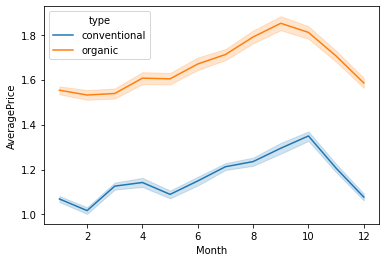

In [59]:
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=df)
plt.show()

# the price of avocado with months with diffrent types 

In [50]:
# dividing the data into two parts for training and prediction 

# taking target as average price for predicting the price


X=df_final.iloc[:,1:14]
y=df_final['AveragePrice']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [51]:
#Applying the linear regresion

from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
pred=lr.predict(X_test)


In [52]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))

0.43307059346767196


In [53]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.232971332916559
MSE: 0.09108802805339433
RMSE: 0.30180793238978054


In [54]:
#applying the decision tree 

from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(X_train,y_train)
pred=dtr.predict(X_test)

In [55]:
print(r2_score(y_test,pred))

0.7208086102735995


In [56]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.13593424657534245
MSE: 0.04485742465753425
RMSE: 0.21179571444562859


In [79]:
# applying random forest 

from sklearn.ensemble import RandomForestRegressor
rdr = RandomForestRegressor()
rdr.fit(X_train,y_train)
pred=rdr.predict(X_test)

In [68]:
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 0.10029402739726026
MSE: 0.021283571156164378
RMSE: 0.14588890004439808


In [69]:
print(r2_score(y_test,pred))

0.8675316326160911


In [70]:
# applying cross validation 

In [71]:
# AFTER CROSSVALIDATION THERE IS A DRASTIC RISE IN THE MODEL PERFORMANCE SO I AM GOINT TO SELECT THE BEST MODEL ON BASIS OF 
# ERRORS 


score=cross_val_score(lr,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[1. 1. 1. 1. 1.]
1.0
0.0


In [72]:
score=cross_val_score(dtr,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.99998241 0.99999815 0.99999916 0.9998949  0.99859511]
0.9996939452149315
0.0005507687318526374


In [78]:
score=cross_val_score(rdr,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.99999955 0.99999886 0.99999966 0.99992458 0.99989524]
0.9999635789325113
4.4791064314263515e-05


# selecting the best model 
#RMSE for linear regression is  0.30180793238978054
#RMSE for dicesiontree  0.21179571444562859
#RMSE for randomforest is  0.14588890004439808

#SO I WOULD RECOMEND THAT RANDOMFOREST IS THE BEST MODEL 

In [77]:
#SAVING THE BEST MODEL 

import  pickle as pk
file=open('avacardomodel_REGRESSION.pkl','wb')
pk.dump(rdr,file)

# * Conclusions

In [ ]:
THE PROBLEM STATEMENT HAD TWO WAYS TO LOOK AT IT A REGRESSION PROBLEM AND A CLASSFICATION ,
I HAVE LEARNT ALOT FROM THIS PROJECT AND HAVE DISCOVERED HOW TO APPLY DIFFRENT MENTHODS TO IMPROVE THE ACCURACY OF MODEL, 
IN BOTH REGRESSION AND CLASSIFICATION PROBLEM RANDOMFOREST MODEL HAS PERFORMED THE BEST 